In [501]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [502]:
deliveries_df = pd.read_csv("./innings_deliveries.csv")
deliveries_df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


### 1) Total runs scored by each team and the match winner


In [503]:
total_runs_scored_by_each_team = (
    deliveries_df.groupby("team")
    .aggregate({"runs_batter": "sum", "runs_extras": "sum", "runs_total": "sum"})
    .reset_index()
)
total_runs_scored_by_each_team.columns = [
    "Team",
    "Runs by Batters",
    "Runs by Extras",
    "Total Runs Scored",
]
total_runs_scored_by_each_team

,Team,Runs by Batters,Runs by Extras,Total Runs Scored
0,Delhi Capitals,134,6,140
1,Royal Challengers Bengaluru,177,10,187


##### Royal Challengers Bengaluru: 187

##### Delhi Capitals: 140

##### Based on the findings, it is clear that RCB won the match by a margin of 47 runs.


#### 2) Run distribution per over


In [504]:
# data preparation for run distribution per over
run_distribution = (
    deliveries_df.groupby(["team", "over"]).agg({"runs_total": "sum"}).reset_index()
)
run_distribution.rename(columns={"runs_total": "runs"}, inplace=True)
print(run_distribution.head(10))

             team  over  runs
0  Delhi Capitals     0     9
1  Delhi Capitals     1    15
2  Delhi Capitals     2     4
3  Delhi Capitals     3     2
4  Delhi Capitals     4    13
5  Delhi Capitals     5    11
6  Delhi Capitals     6     9
7  Delhi Capitals     7     8
8  Delhi Capitals     8    10
9  Delhi Capitals     9     6


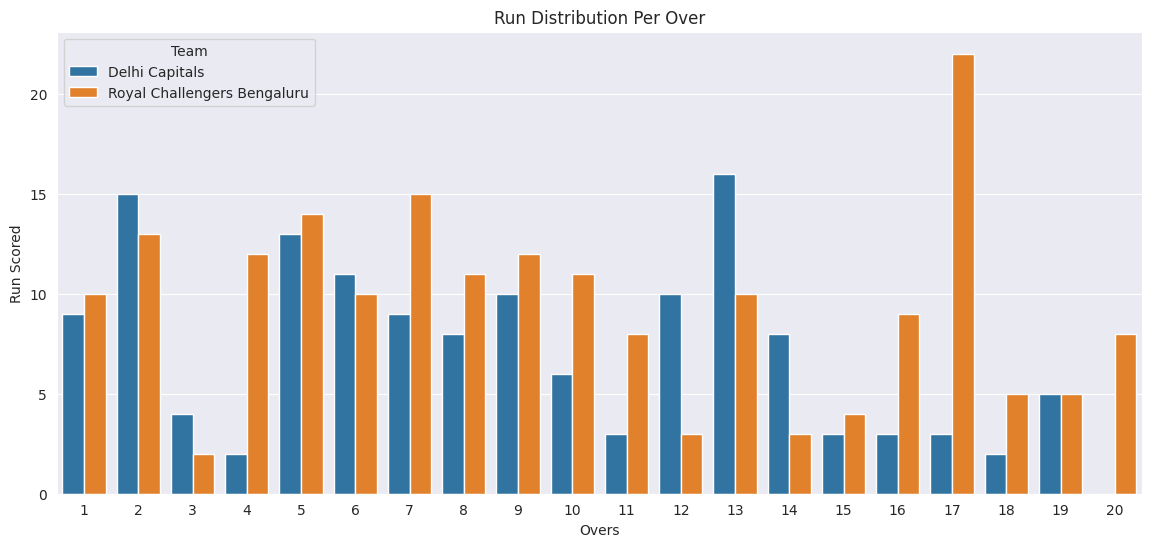

In [505]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 6))
sns.barplot(data=run_distribution, x="over", y="runs", hue="team")
plt.xlabel("Overs")
plt.ylabel("Run Scored")
plt.xticks(range(0, 20), labels=range(1, 21))
plt.title("Run Distribution Per Over")
plt.legend(title="Team")
plt.show()

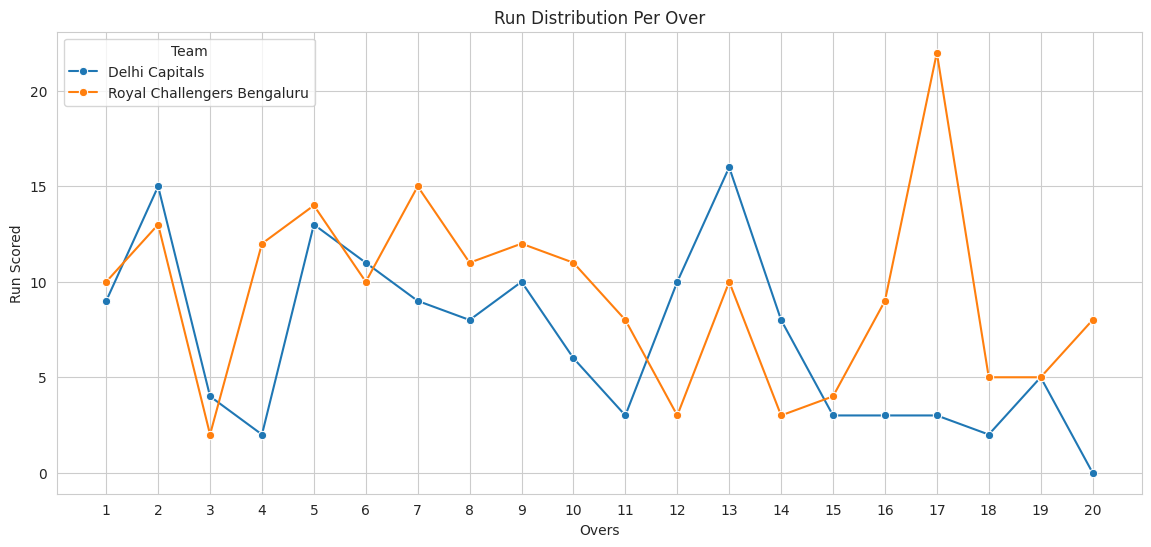

In [506]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))
# plotting run distribution per over for both teams
sns.lineplot(data=run_distribution, x="over", y="runs", hue="team", marker="o")
plt.xlabel("Overs")
plt.ylabel("Run Scored")
plt.xticks(range(0, 20), labels=range(1, 21))
plt.title("Run Distribution Per Over")
plt.legend(title="Team")
plt.show()

### 3) Top Scorers for each team


In [507]:
top_scorers = (
    deliveries_df.groupby(["team", "batter"])
    .aggregate({"runs_batter": "sum"})
    .reset_index()
    .sort_values(by="runs_batter", ascending=False)
)
top_scorers = top_scorers[top_scorers.runs_batter > 0]
top_scorers

,team,batter,runs_batter
0,Delhi Capitals,AR Patel,57
16,Royal Challengers Bengaluru,RM Patidar,52
19,Royal Challengers Bengaluru,WG Jacks,41
11,Royal Challengers Bengaluru,C Green,32
9,Delhi Capitals,SD Hope,29
18,Royal Challengers Bengaluru,V Kohli,27
4,Delhi Capitals,J Fraser-McGurk,21
15,Royal Challengers Bengaluru,MK Lomror,13
8,Delhi Capitals,Rasikh Salam,10
12,Royal Challengers Bengaluru,F du Plessis,6


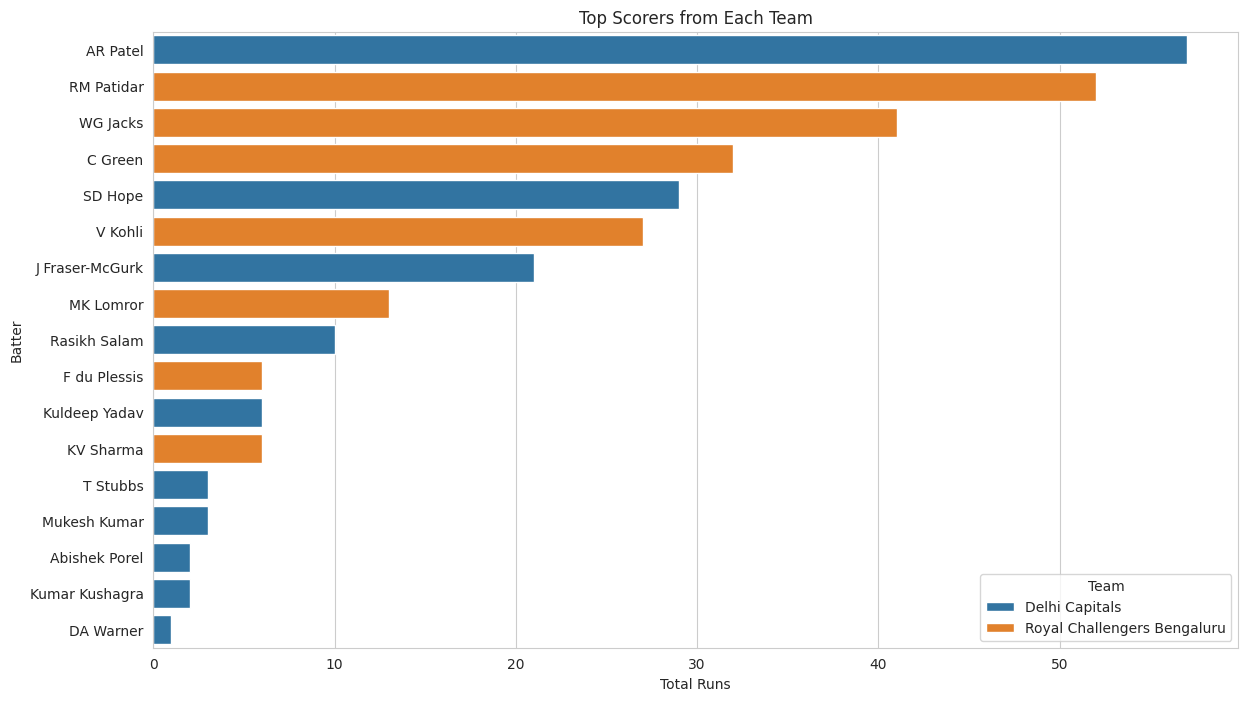

In [508]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x="runs_batter", y="batter", hue="team")
plt.title("Top Scorers from Each Team")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.legend(title="Team", loc="lower right")
plt.show()

### Bowling analysis - wicket taken by each bowler and economy rate


In [509]:
# deliveries_with_non_runout_wickets = deliveries_df[
#     (deliveries_df["wicket_kind"].notnull())
#     & (deliveries_df["wicket_kind"] != "run out")
# ]

"""
Wicken taken by each bowlers
"""
deliveries_with_non_runout_wickets = deliveries_df.query('wicket_kind != "run out"')
bowler_wickets_taken = (
    deliveries_with_non_runout_wickets.groupby(["team", "bowler"])
    .aggregate({"wicket_kind": "count"})
    .reset_index()
)
bowler_wickets_taken.columns = ["team", "bowler", "wickets_taken"]
bowler_wickets_taken

,team,bowler,wickets_taken
0,Delhi Capitals,C Green,1
1,Delhi Capitals,KV Sharma,0
2,Delhi Capitals,LH Ferguson,2
3,Delhi Capitals,Mohammed Siraj,1
4,Delhi Capitals,Swapnil Singh,1
5,Delhi Capitals,WG Jacks,0
6,Delhi Capitals,Yash Dayal,3
7,Royal Challengers Bengaluru,AR Patel,0
8,Royal Challengers Bengaluru,I Sharma,1
9,Royal Challengers Bengaluru,KK Ahmed,2


In [510]:
bowler_economy_rate = (
    deliveries_df.groupby(["team", "bowler"])
    .aggregate({"runs_total": "sum", "over": "count"})
    .reset_index()
)
bowler_economy_rate["over"] = round(bowler_economy_rate["over"] / 6, 1)
bowler_economy_rate["economy_rate"] = round(
    bowler_economy_rate["runs_total"] / bowler_economy_rate["over"], 2
)
bowler_economy_rate.columns = ["team", "bowler", "runs", "overs", "economy_rate"]
bowler_economy_rate

,team,bowler,runs,overs,economy_rate
0,Delhi Capitals,C Green,19,4.3,4.42
1,Delhi Capitals,KV Sharma,19,2.0,9.50
2,Delhi Capitals,LH Ferguson,24,4.0,6.00
3,Delhi Capitals,Mohammed Siraj,33,4.3,7.67
4,Delhi Capitals,Swapnil Singh,9,1.0,9.00
5,Delhi Capitals,WG Jacks,16,1.0,16.00
6,Delhi Capitals,Yash Dayal,20,3.3,6.06
7,Royal Challengers Bengaluru,AR Patel,24,3.0,8.00
8,Royal Challengers Bengaluru,I Sharma,31,3.5,8.86
9,Royal Challengers Bengaluru,KK Ahmed,32,4.0,8.00


In [511]:
bowler_stats = pd.merge(
    bowler_economy_rate, bowler_wickets_taken, on=["team", "bowler"]
)
bowler_stats.sort_values(by=["team", "wickets_taken"], ascending=False, inplace=True)
bowler_stats

,team,bowler,runs,overs,economy_rate,wickets_taken
9,Royal Challengers Bengaluru,KK Ahmed,32,4.0,8.00,2
12,Royal Challengers Bengaluru,Rasikh Salam,23,3.5,6.57,2
8,Royal Challengers Bengaluru,I Sharma,31,3.5,8.86,1
10,Royal Challengers Bengaluru,Kuldeep Yadav,53,4.2,12.62,1
11,Royal Challengers Bengaluru,Mukesh Kumar,24,3.0,8.00,1
7,Royal Challengers Bengaluru,AR Patel,24,3.0,8.00,0
6,Delhi Capitals,Yash Dayal,20,3.3,6.06,3
2,Delhi Capitals,LH Ferguson,24,4.0,6.00,2
0,Delhi Capitals,C Green,19,4.3,4.42,1
3,Delhi Capitals,Mohammed Siraj,33,4.3,7.67,1


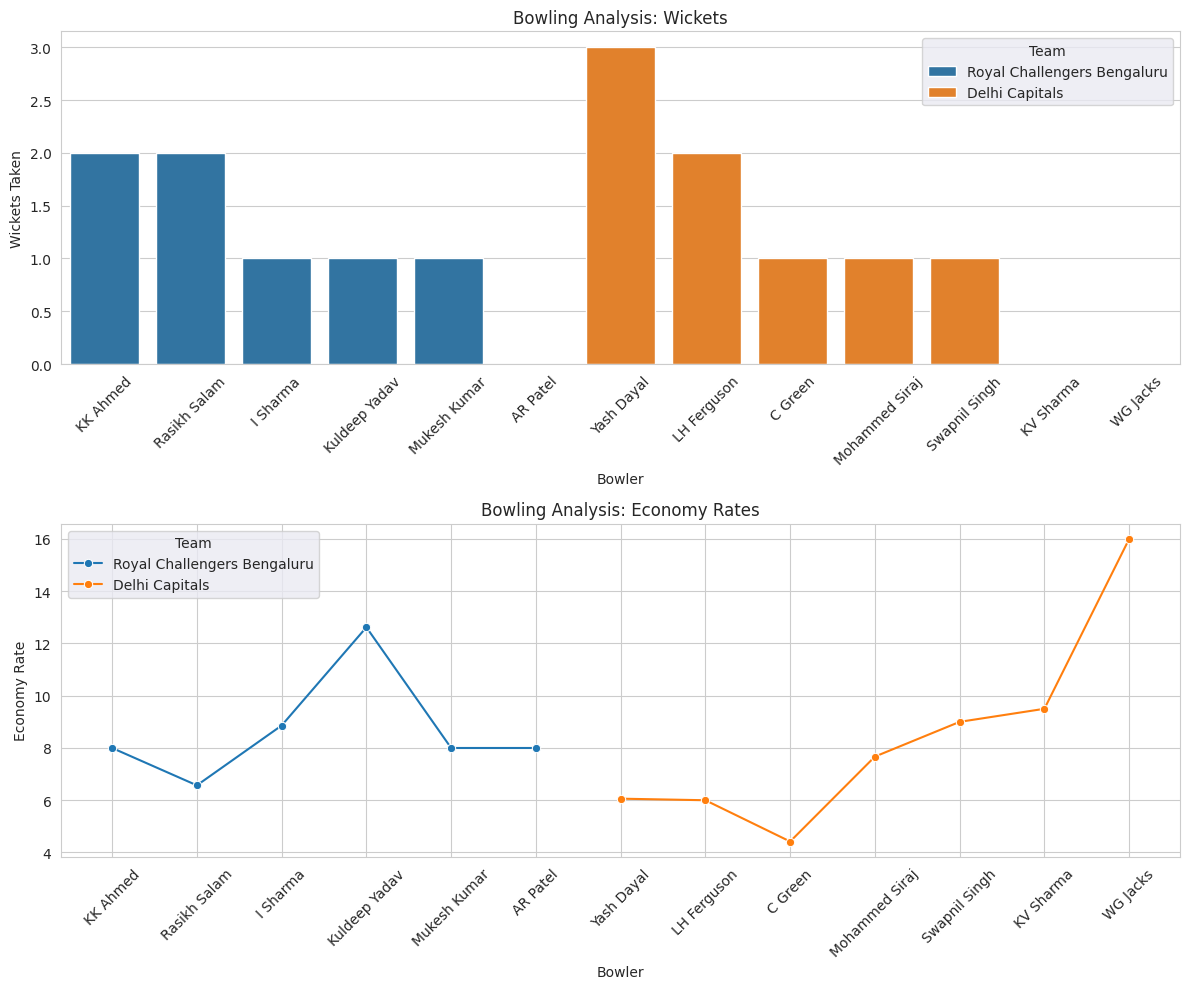

In [512]:
# create the plot
fig, axs = plt.subplots(2, figsize=(12, 10))
sns.set_style("dark")
sns.barplot(data=bowler_stats, x="bowler", y="wickets_taken", hue="team", ax=axs[0])
axs[0].set_title("Bowling Analysis: Wickets")
axs[0].set_xlabel("Bowler")
axs[0].set_ylabel("Wickets Taken")
axs[0].tick_params(axis="x", rotation=45)
axs[0].legend(title="Team", loc="upper right")

sns.lineplot(
    data=bowler_stats, x="bowler", y="economy_rate", hue="team", marker="o", ax=axs[1]
)
axs[1].set_title("Bowling Analysis: Economy Rates")
axs[1].set_xlabel("Bowler")
axs[1].set_ylabel("Economy Rate")
axs[1].tick_params(axis="x", rotation=45)
axs[1].legend(title="Team")

plt.tight_layout()
plt.show()

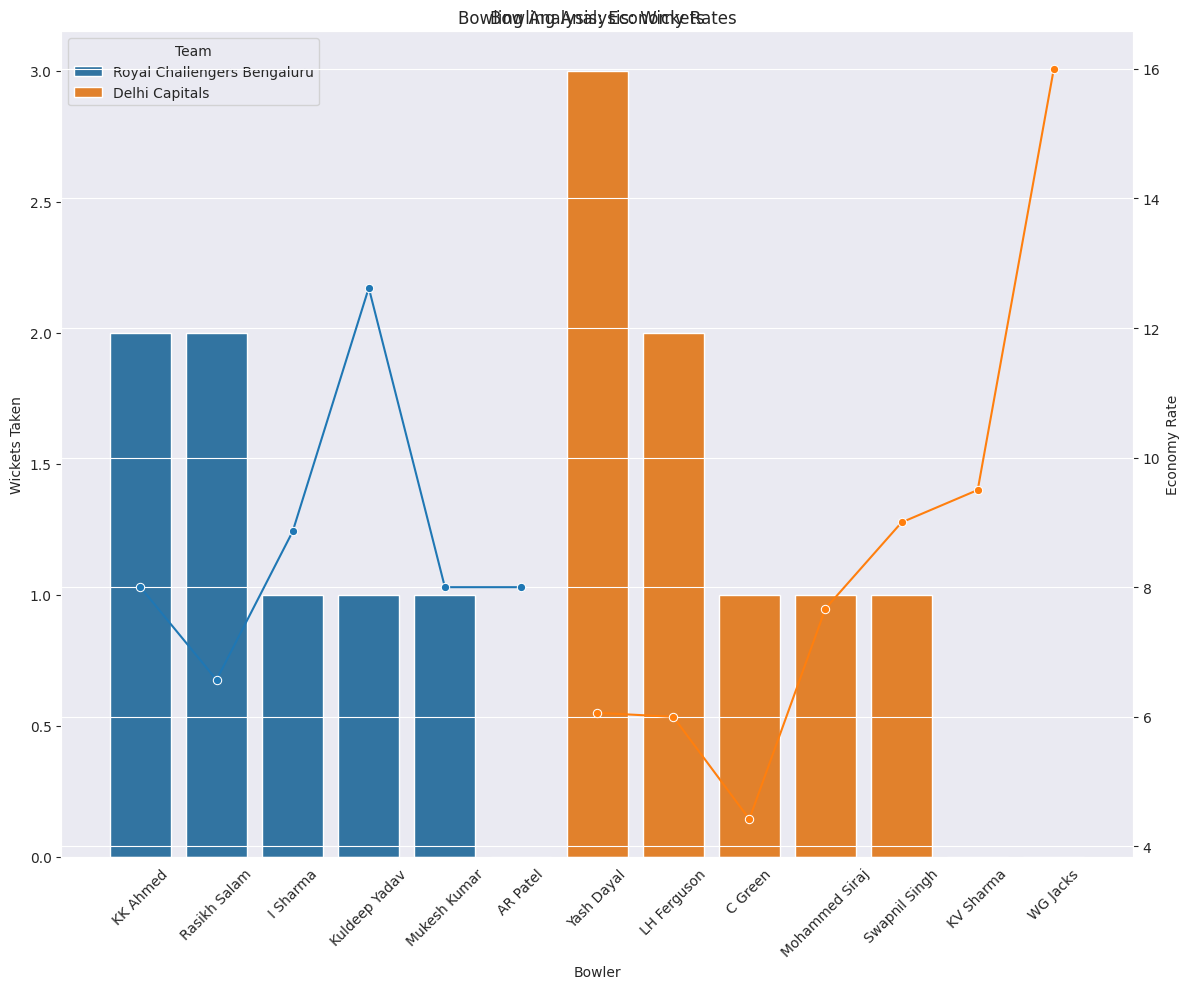

In [513]:
# create the plot
fig, ax1 = plt.subplots(figsize=(12, 10))
sns.set_style("darkgrid")
sns.barplot(data=bowler_stats, x="bowler", y="wickets_taken", hue="team", ax=ax1)
ax1.set_title("Bowling Analysis: Wickets")
ax1.set_xlabel("Bowler")
ax1.set_ylabel("Wickets Taken")
ax1.tick_params(axis="x", rotation=45)
ax1.legend(title="Team", loc="upper left")

ax2 = ax1.twinx()

sns.lineplot(
    data=bowler_stats,
    x="bowler",
    y="economy_rate",
    hue="team",
    marker="o",
    sort=False,
    ax=ax2,
    color="black",
)
ax2.set_title("Bowling Analysis: Economy Rates")
ax2.set_xlabel("Bowler")
ax2.set_ylabel("Economy Rate")
ax2.tick_params(axis="x", rotation=45)
ax2.legend().remove()

plt.tight_layout()
plt.show()